In [2]:
from pyspark.sql import SparkSession, functions as f, DataFrame
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython import display
import time

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adauto_junior/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
spark = SparkSession.builder\
  .master('local[*]')\
  .appName('WordCloud')\
  .getOrCreate()

your 131072x1 screen size is bogus. expect trouble


22/12/07 21:50:49 WARN Utils: Your hostname, LEV_DEV resolves to a loopback address: 127.0.1.1; using 172.24.56.187 instead (on interface eth0)
22/12/07 21:50:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/07 21:50:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
def trata_tweets(df: DataFrame) -> DataFrame:
  return df\
    .select(
      f.explode(f.split(f.lower('_c0'), ' ')).alias('word')
    ).withColumn(
      'word',
      f.regexp_replace('word', r'http\S+', '')
    ).withColumn(
      'word', 
      f.regexp_replace('word', r'@\w+', '')
    ).withColumn(
      'word', f.regexp_replace('word', 'rt', '')
    ).na.replace('', None).na.drop()

In [6]:
stops = stopwords.words('portuguese')
stops.append('copa')
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

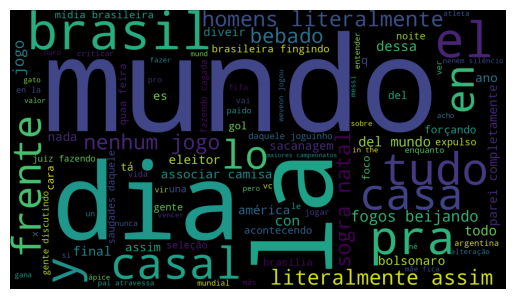

In [8]:
while True:
  try:
    words = spark.read.csv('./csv', encoding='utf-8')
    words = trata_tweets(words)
    rows = words.collect()
    all_words = ''
    for row in rows:
      all_words = all_words + ' ' + row['word']

    wordcloud = WordCloud(
      stopwords=stops,
      background_color='black',
      width=1920,
      height=1080,
      max_words=100
    ).generate(all_words)

    plt.cla()
    plt.axis('off')
    plt.imshow(wordcloud)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(5)
  except KeyboardInterrupt:
    break